<a href="https://colab.research.google.com/github/silventesa/challenge-mole/blob/francesco/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import cv2
import os

In [55]:
#trying different filters
from skimage import exposure
from skimage import color

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [25]:
URL_S = "/content/drive/My Drive/labeled_dataset/class_s/"
URL_D = "/content/drive/My Drive/labeled_dataset/class_d/"

In [68]:
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(18,13))
    
    plt.subplot(121)
    if isGray:
        # If we want to display a gray image, we have to tell pyplot to use a gray color map,
        # otherwise it will not render the image as grayscale
        plt.imshow(original_img, cmap="gray") 
    else:
        plt.imshow(original_img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        plt.imshow(edited_img, cmap="gray")
    else:
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])

    plt.show()

In [36]:
folder = URL_D
suffix = r".bmp"
images_number = 100
filenames = [f for f in os.listdir(folder) if f.endswith(suffix)]

print(f'{len(filenames)} images found')
images = {}
s = datetime.now()

c = 0
for filename in filenames:
  img=image.imread(folder+filename)
  images[filename] = img
  c+=1
  if c == images_number:
    break
print(f'Importing time for {c} images: {datetime.now()-s}')

629 images found
Importing time for 100 images: 0:00:00.396191


In [40]:
images_number = 10
c = 0
for filename in images.keys():
  print(filename)
  c+=1
  if c == images_number:
    break

d_d199.bmp
d_d172.bmp
d_d100.bmp
d_d211.bmp
d_d167.bmp
d_d16.bmp
d_d122.bmp
d_d21.bmp
d_d148.bmp
d_d138.bmp


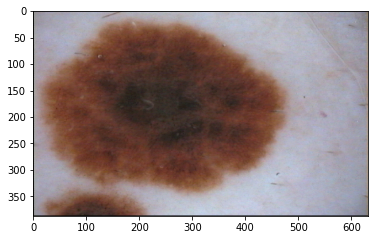

In [51]:
img = images['d_d199.bmp']
fig, ax = plt.subplots()
ax.imshow(img)


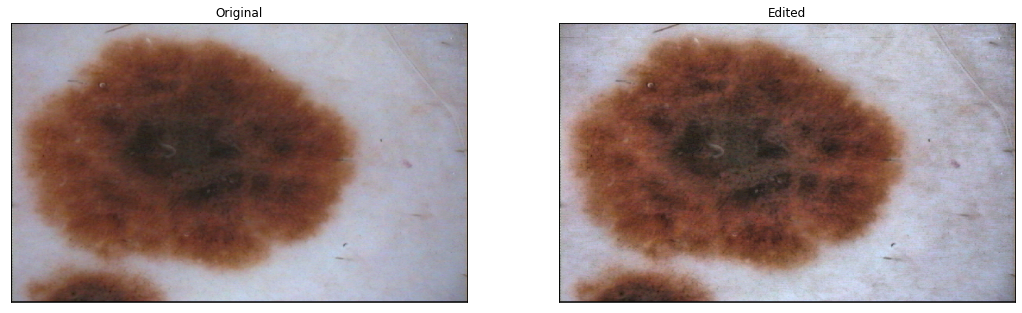

In [69]:
img_adp= exposure.equalize_adapthist(img, clip_limit=0.03)
#fig, ax = plt.subplots()
#ax.imshow(img_adp)
display_two(img, img_adp)

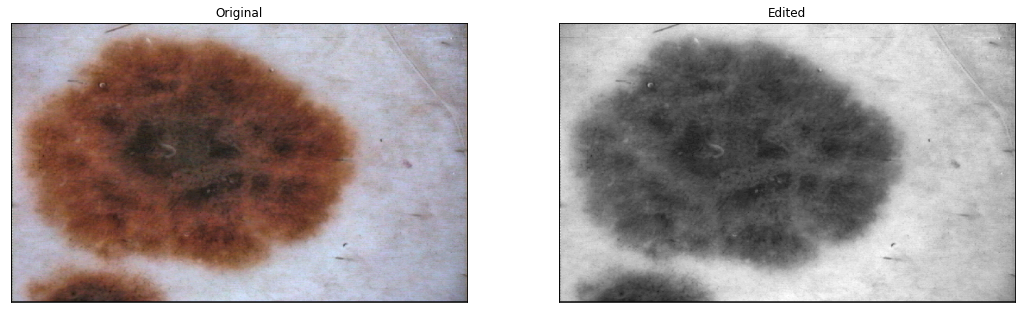

In [72]:
img_adp_gry=color.rgb2gray(img_adp)
#fig, ax = plt.subplots()
#cmap=plt.cm.gray
ax.imshow(img_adp_gry, cmap=cmap)
#ax.set_axis_off()#
display_two(img_adp, img_adp_gry, isGray=True)